In [2]:
import pandas as pd
from pandas.io.json import json_normalize 
import numpy as np
import json
import urllib.request

In [3]:
API_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TSLA&interval=5min&outputsize=full&apikey=VOI03MVRS6FO3IWR"

In [4]:
with urllib.request.urlopen(API_url) as response:
   data_1 = json.loads(response.read())

In [5]:
df = pd.DataFrame()
for key in data_1['Time Series (Daily)']:
    x = json_normalize(data=data_1['Time Series (Daily)'][key])
    x['Time'] = key
    df = df.append(x,sort=False)
df = df.reset_index()

In [6]:
df.head()

,index,1. open,2. high,3. low,4. close,5. volume,Time
0,0,497.1000,498.8000,472.8700,482.1350,24407495,2020-01-09
1,0,473.7000,498.4900,468.2300,492.1400,30696360,2020-01-08
2,0,461.4000,471.6300,453.3550,469.0600,18209138,2020-01-07
3,0,440.4700,451.5600,440.0000,451.5400,10157499,2020-01-06
4,0,440.5000,454.0000,436.9200,443.0100,17794697,2020-01-03


In [7]:
df['daily_return'] = pd.to_numeric(df['4. close']).pct_change(-1)

In [8]:
df['timestamp'] = pd.to_datetime(df['Time'])

In [9]:
df = df.drop(columns = ['Time'])

In [10]:
df.head()

,index,1. open,2. high,3. low,4. close,5. volume,daily_return,timestamp
0,0,497.1000,498.8000,472.8700,482.1350,24407495,-0.020330,2020-01-09
1,0,473.7000,498.4900,468.2300,492.1400,30696360,0.049205,2020-01-08
2,0,461.4000,471.6300,453.3550,469.0600,18209138,0.038801,2020-01-07
3,0,440.4700,451.5600,440.0000,451.5400,10157499,0.019255,2020-01-06
4,0,440.5000,454.0000,436.9200,443.0100,17794697,0.029633,2020-01-03


In [11]:
df = df.sort_values(by = ['timestamp']).reset_index()

In [12]:
df.head()

,level_0,index,1. open,2. high,3. low,4. close,5. volume,daily_return,timestamp
0,2399,0,19.0000,25.0000,17.5400,23.8900,18766300,NaN,2010-06-29
1,2398,0,25.7900,30.4192,23.3000,23.8300,17187100,-0.002512,2010-06-30
2,2397,0,25.0000,25.9200,20.2700,21.9600,8218800,-0.078473,2010-07-01
3,2396,0,23.0000,23.1000,18.7100,19.2000,5139800,-0.125683,2010-07-02
4,2395,0,20.0000,20.0000,15.8300,16.1100,6866900,-0.160937,2010-07-06


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 9 columns):
level_0         2400 non-null int64
index           2400 non-null int64
1. open         2400 non-null object
2. high         2400 non-null object
3. low          2400 non-null object
4. close        2400 non-null object
5. volume       2400 non-null object
daily_return    2399 non-null float64
timestamp       2400 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 168.9+ KB


In [14]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

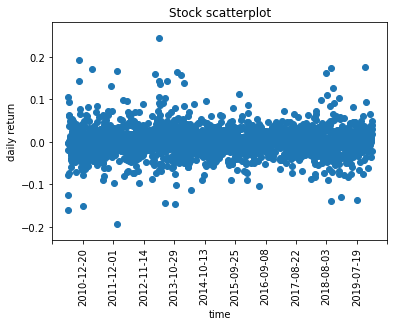

In [15]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['timestamp'].astype('str'), df['daily_return'])
# set a title and labels
ax.set_title('Stock scatterplot')
ax.set_xlabel('time')
ax.set_ylabel('daily return')
plt.xticks(rotation=90)
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 12), 2))
plt.show()

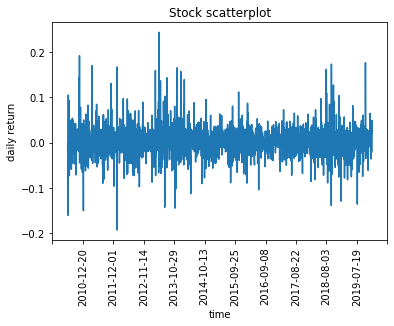

In [16]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.plot(df['timestamp'].astype('str'), df['daily_return'])
# set a title and labels
ax.set_title('Stock scatterplot')
ax.set_xlabel('time')
ax.set_ylabel('daily return')
xmin, xmax = ax.get_xlim()
plt.xticks(rotation=90)
ax.set_xticks(np.round(np.linspace(xmin, xmax, 12), 2))
plt.show()

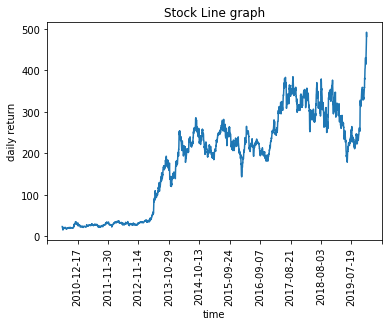

In [17]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.plot(df['timestamp'].astype('str'), df['4. close'].astype('float'))
# set a title and labels
ax.set_title('Stock Line graph')
ax.set_xlabel('time')
ax.set_ylabel('daily return')
xmin, xmax = ax.get_xlim()
plt.xticks(rotation=90)
ax.set_xticks(np.round(np.linspace(xmin, xmax, 12), 2))
plt.show()

In [30]:
df[['1. open', '2. high', '3. low', '4. close', '5. volume']] = df[['1. open', '2. high', '3. low', '4. close', '5. volume']].apply(pd.to_numeric) 
print(df.dtypes) 

level_0                  int64
index                    int64
1. open                float64
2. high                float64
3. low                 float64
4. close               float64
5. volume                int64
daily_return           float64
timestamp       datetime64[ns]
dtype: object


In [18]:
import seaborn as sns

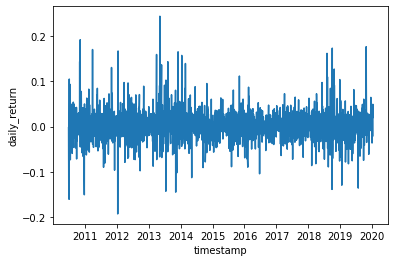

In [21]:
sns.lineplot(x='timestamp', y='daily_return', data=df)

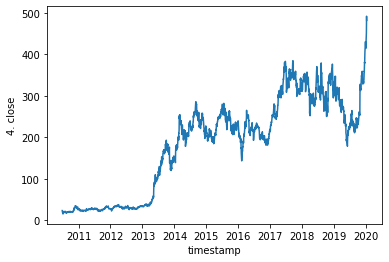

In [31]:
sns.lineplot(x='timestamp', y='4. close', data=df)

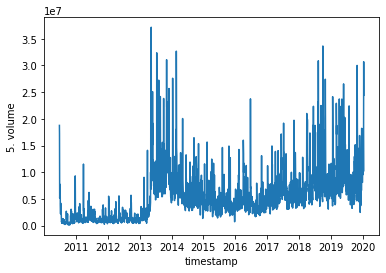

In [33]:
sns.lineplot(x='timestamp', y='5. volume', data=df)

In [34]:
from sklearn import preprocessing

In [40]:
df = df.drop(columns = ['level_0', 'index'])

In [42]:
data_normaliser = preprocessing.MinMaxScaler()
data_normalised = data_normaliser.fit_transform(df.drop(columns = ['timestamp']))

AttributeError: 'numpy.ndarray' object has no attribute 'head'